In [1]:
# Constants

EPOCHS:int = 20
NUM_WORKERS:int = 8

# Helpful resources
# https://krasserm.github.io/2019/03/14/bayesian-neural-networks/

In [2]:
import regression
import torch
from torch.utils.data import TensorDataset, DataLoader

train_x, test_x, train_y, test_y = regression.regression_dataset()

def create_data_loader(x: torch.Tensor, y: torch.Tensor, batch_size:int, num_workers:int) -> DataLoader:
    dataset = TensorDataset(x, y)
    return DataLoader(dataset=dataset, batch_size=batch_size, num_workers=num_workers)

train_loader = create_data_loader(train_x, train_y, batch_size=32, num_workers=NUM_WORKERS)
test_loader = create_data_loader(test_x, test_y, batch_size=32, num_workers=NUM_WORKERS)

In [36]:
import variational as var

model = var.VI()
optim = torch.optim.Adam(model.parameters(), lr=0.005)

for epoch in range(300):
    for X, Y in train_loader:
        optim.zero_grad()
        y_pred, mu, log_var = model(X)
        loss = var.neg_elbo(y_pred, Y, mu, log_var)
        loss.backward()
        optim.step()
    print(f"epoch: {epoch} finished, current loss: {loss}")


epoch: 0 finished, current loss: 2.2208304405212402
epoch: 1 finished, current loss: 2.355485200881958
epoch: 2 finished, current loss: 1.887139916419983
epoch: 3 finished, current loss: 2.228611469268799
epoch: 4 finished, current loss: 1.7290512323379517
epoch: 5 finished, current loss: 1.8168466091156006
epoch: 6 finished, current loss: 1.8289377689361572
epoch: 7 finished, current loss: 1.7605177164077759
epoch: 8 finished, current loss: 1.8409167528152466
epoch: 9 finished, current loss: 1.6647615432739258
epoch: 10 finished, current loss: 1.9734699726104736
epoch: 11 finished, current loss: 1.8711718320846558
epoch: 12 finished, current loss: 1.827427625656128
epoch: 13 finished, current loss: 1.814743995666504
epoch: 14 finished, current loss: 2.20436692237854
epoch: 15 finished, current loss: 1.8552778959274292
epoch: 16 finished, current loss: 1.8667725324630737
epoch: 17 finished, current loss: 1.9661290645599365
epoch: 18 finished, current loss: 1.842057466506958
epoch: 19 f

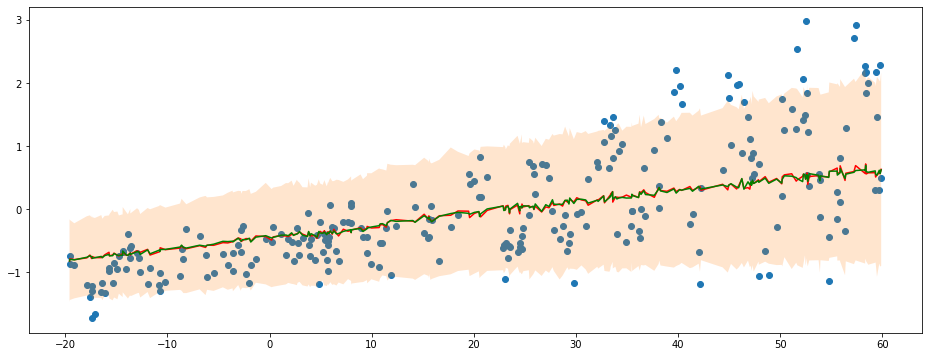

In [37]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# draw samples from Q(theta)
with torch.no_grad():
    y_pred = torch.cat([model(test_x)[0].detach() for _ in range(1000)], dim=1)


    
# Get some quantiles
q1, _, q2 = np.quantile(y_pred, [0.16, 0.5, 0.84], axis=1)

median = np.median(y_pred, axis=1)
mean = np.mean(y_pred.numpy(), axis=1)
plt.figure(figsize=(16, 6))
plt.scatter(test_x, test_y)
plt.plot(test_x, median, color="r")
plt.plot(test_x, mean, color="g")
plt.fill_between(test_x.flatten(), q1, q2, alpha=0.2)
plt.show()